In [153]:
# From the course: Bayesin Machine Learning in Python: A/B Testing
# https://deeplearningcourses.com/c/bayesian-machine-learning-in-python-ab-testing
# https://www.udemy.com/bayesian-machine-learning-in-python-ab-testing
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

In [154]:
import matplotlib.pyplot as plt
import numpy as np

In [155]:
NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [156]:
class BanditArm:
  def __init__(self, p):
    # p: the win rate
    self.p = p
    self.p_estimate = 0.
    self.N = 0. # num samples collected so far

  def pull(self):
    # draw a 1 with probability p
    return np.random.random() < self.p

  def update(self, x):
    self.N += 1.
    self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N

In [157]:
def choose_random_argmax(a):
  idx = np.argwhere(np.amax(a) == a).flatten()
  return np.random.choice(idx)

In [158]:
eps = []
def experiment():
  bandits = [BanditArm(p) for p in BANDIT_PROBABILITIES]

  rewards = np.zeros(NUM_TRIALS)
  num_times_explored = 0
  num_times_exploited = 0
  num_optimal = 0
  optimal_j = np.argmax([b.p for b in bandits])
  print("optimal j:", optimal_j)

  for i in range(NUM_TRIALS):
    EPS1 = EPS/(1+10*i/NUM_TRIALS)
    eps.append(EPS1)
    # use epsilon-greedy to select the next bandit
    if np.random.random() < EPS1:
      num_times_explored += 1
      j = np.random.randint(len(bandits))
    else:
      num_times_exploited += 1
      j = choose_random_argmax([b.p_estimate for b in bandits])

    if j == optimal_j:
      num_optimal += 1

    # pull the arm for the bandit with the largest sample
    x = bandits[j].pull()

    # update rewards log
    rewards[i] = x

    # update the distribution for the bandit whose arm we just pulled
    bandits[j].update(x)



  # print mean estimates for each bandit
  for b in bandits:
    print("mean estimate:", b.p_estimate," ","num samples:", b.N)

  # print total reward
  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num_times_explored:", num_times_explored)
  print("num_times_exploited:", num_times_exploited)
  print("num times selected optimal bandit:", num_optimal)

  # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

optimal j: 2
mean estimate: 0.2530120481927711   num samples: 83.0
mean estimate: 0.5915492957746478   num samples: 71.0
mean estimate: 0.7554336786512301   num samples: 9846.0
total reward earned: 7501.0
overall win rate: 0.7501
num_times_explored: 231
num_times_exploited: 9769
num times selected optimal bandit: 9846


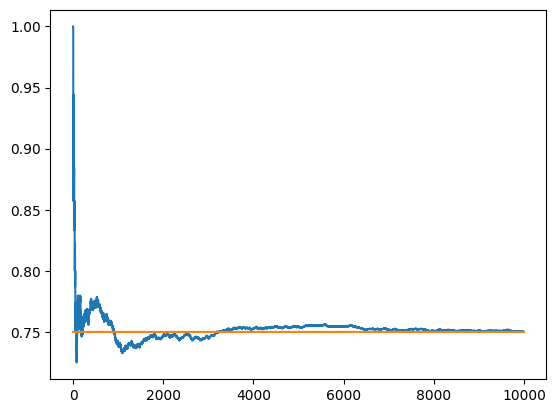

In [159]:
if __name__ == "__main__":
  experiment()

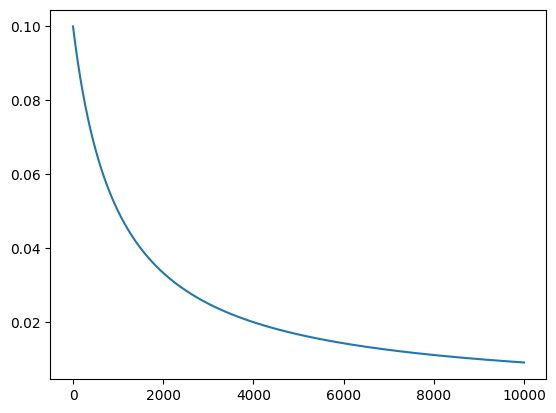

In [160]:
plt.plot(eps)

In [161]:
# MY COMMENTS: Made EPS dynamically declining to reduce need for random sampling as more data is collected